In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

with MPRester("f8gAbZFioEswIMUD") as m:

    structure = m.get_structure_by_material_id("mp-6980")
    bandcris = m.get_bandstructure_by_material_id("mp-6980")#structure de la bande de cristale
    BSplot = BSPlotter(bandcris)#pour pouvoir afficher le graphe
    Data = BSplot.bs_plot_data()#récupération des data

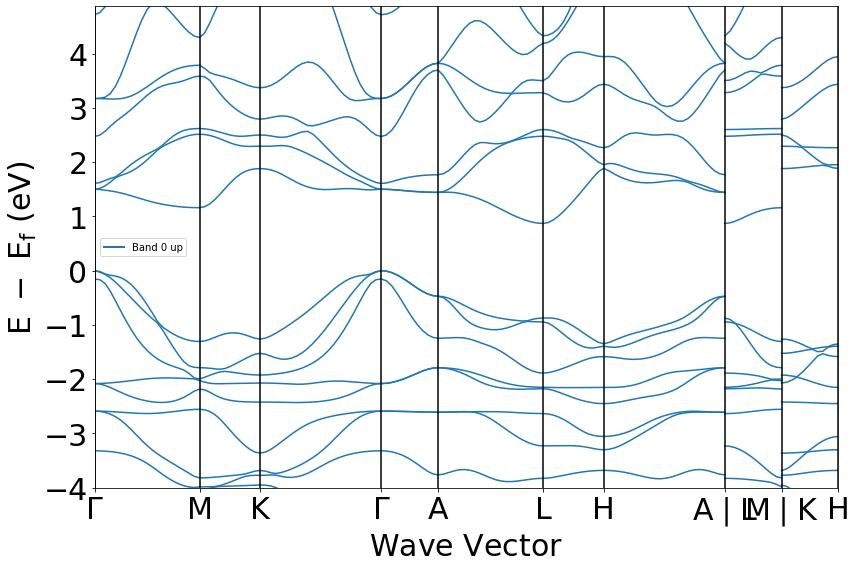

In [2]:
BSplot.show()

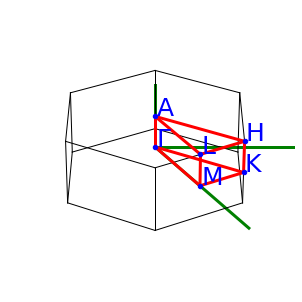

In [3]:
BSplot.plot_brillouin()

## Bande interdite

In [4]:
BI = bandcris.get_band_gap()
print(BI)


{'direct': False, 'energy': 0.8709000000000007, 'transition': '\\Gamma-L'}


In [5]:
%%html
<img src = "bande_interdite.jpg">

Il s'agit d'une bande indirecte, cela signifie que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. Cela est très facilement vérifiable sur le graphe ci-dessus.
On peut donc suposer qu'il y aura probablement l'émission de phonons lors du franchissement de la bande interdite.

La bande interdite a une largeur de 0,871 eV et la transition se fait du kpoint Gamma au kpoint L.

## Dispersion de la dernière bande de valence

Pour déterminer les directions de dispersion dans la dernière bande de valence ainsi que la première bande de conduction,il est nécessaire de trouver la pente dont la valeur absolue est la plus élevée ainsi que la plus faible.

In [6]:
ticks = Data.get('ticks')
distance = ticks.get('distance')
Wdistance = []
Energie = Data['energy']
for i in range(15):
    dist = distance[i+1]-distance[i]
    if dist not in Wdistance :
        if dist != 0:
            Wdistance.append(dist)

diff_E_c = []
pente_c = []

for band in range(len(Wdistance)):
    curr = Energie['1'][band][:][20]
    diff_E_c.append(curr[-1]-curr[0])

diff_E_v = []
pente_v = []

for band in range(len(Wdistance)):
    curr = Energie['1'][band][:][19]
    diff_E_v.append(curr[-1]-curr[0])
 
    
for i in range(len(Wdistance)):
    pente_c.append(abs(diff_E_c[i]/Wdistance[i]))
    pente_v.append(abs(diff_E_v[i]/Wdistance[i]))

max_pente_c = max(pente_c)
min_pente_c = min(pente_c)
max_pente_v = max(pente_v)
min_pente_v = min(pente_v)
i_max_c = 0
i_min_c = 0
i_max_v = 0
i_min_v = 0

for i in range(len(pente_c)):
    if (pente_c[i] == max_pente_c):
        i_max_c = i
    if (pente_c[i] == min_pente_c):
        i_min_c = i      
for j in range(len(pente_v)):
    if (pente_v[j] == max_pente_v):
        i_max_v = j
    if (pente_v[j] == min_pente_v):
        i_min_v = j
        

print("La pente maximale de conduction vaut",max_pente_c,"et se trouve à l'index :",i_max_c)
print(" ")
print("La pente minimale de conduction vaut",min_pente_c,"et se trouve à l'index :",i_min_c)
print(" ")
print("La pente maximale de valence vaut",max_pente_v,"et se trouve à l'index :",i_max_v)
print(" ")
print("La pente minimale valence :",min_pente_v,"et se trouve à l'index :",i_min_v)

La pente maximale de conduction vaut 1.8169825020819754 et se trouve à l'index : 5
 
La pente minimale de conduction vaut 0.1106553377640388 et se trouve à l'index : 3
 
La pente maximale de valence vaut 1.3502515756497904 et se trouve à l'index : 0
 
La pente minimale valence : 0.08328209595545787 et se trouve à l'index : 1


In [7]:
%%html
<img src = "cond-val.png">

Sur l'image ci-dessus nous pouvons voir la représentation du maximum et du minimum de valence(max val et min val) ainsi que le maximum et le minimum de conduction (min cond et max cond). Cette vérification graphique permet de s'assurer de la justesse des résultats obtenus précédemment.

On peut donc conclure que la direcsion de dispersion maximale de la bande de valence est la direction Gamma-M. Tandis que la direction avec le moins de dispersion est la direction M-K.

Pour la bande de conduction la direction de dispersion minimale se trouve entre les k-points Gamma et A et la direction de dispestion maximale entre L et H.

## Masse effective

Si l'on suppose une dispersion parabolique, l'équation de la masse éffective $m^*$ s'écrit sous la forme:
$m^* = \frac{\hbar^2}{\frac{\partial^2 E}{\partial k^2}}$
où $\hbar$ est la constante de Planck qui vaut 1,054571817E-34J.s.
Etant donné que la dispersion est supposée parabolique on peut écrire l'énerige tel que E(k) = ak²+bk+c. En interpolant cette énergie autour des points qui nous intéresse, nous serons capables de déterminer  $\frac{\partial^2 E}{\partial k^2}$ et finalement en replacant le tout dans la première équation nous obtenons la masse éffective.

Je n'ai malheureusement pas été capable de trouver une solution satisfaisante, malgré de nombreuses recherches et différentes apporches du problème.